# Stochastic Physics-Informed Neural ODEs (SPINODE)

A few key notes:

(1) The code here is tailored to learn neural network representations of hidden physics within stochastic differential equations of the form:

$$ dx = g_1(x,u)dt + \sqrt{2g_2(x,u)} dw, $$

where where $x$ is the system state, $u$ is an exogenous input, $w$ is a Gaussian white noise process, $g_1$ is the drift coefficient, and $g_2$ is the diffusion coefficient. Although the drift and diffusion coefficients represent the underlying physics of the stochastic system, these coefficients may not be known or even measurable in practice. As a result, $g_1$, $g_2$, or individual functions that contribute to $g_1$ and $g_2$ can comprise the the hidden physics of the above equation.

(2) The code uses unscented transform to propagate stochasticity through the above equations although other uncertainty propagation methods can be integrated into the code. 

(3) Example data and results are provided for the first case study from the original paper (O'Leary et al., 2022) in the file Data.zip. The first case study is a two-state model for directed colloidal self-assembly with an exogenous input.

In [5]:
# Do not write bytecode to maintain clean directories
import sys
sys.dont_write_bytecode = True

# Import required packages and core code
import numpy as np
import os
import torch
import train

# Specify GPU or CPU use
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
# Load moment data
# Mean data must be of shape [N, [nx,nu], 1]
# Covariance data must be of shape [N, nx, nx]
# Note that the general methodology can handle higher moments
# --> This code, however, only uses mean and covariance data

mean_i = np.load("CSA/Data/mean_initial.npy") # mean at time step k
mean_f = np.load("CSA/Data/mean_final.npy") # mean at time step k + 1
cov_i = np.load("CSA/Data/cov_initial.npy") # covariance at time step k
cov_f = np.load("CSA/Data/cov_final.npy") # covariance at time step k + 1

In [7]:
# Enter relevant system information
nx = 1 # state dimension
nw = 1 # noise dimension
n = nx + nw # augmented state dimension
nu = 1 # exogenous input dimension
dt = 1 # sampling time

In [8]:
# Prepare some of the data used to train the neural networks
# that approximate the hidden physics. Note that the "sigma" points come from
# the unscented transform function defined in "utils.py"

# First choose and create path where data will be saved
path = "CSA/Train/"
os.makedirs(path)

# Now prepare data
[sigma_train, 
 sigma_val, 
 sigma_test, 
 mean_f_train,
 mean_f_val, 
 mean_f_test,
 cov_f_train,
 cov_f_val,
 cov_f_test,
 W_train,
 W_val,
 W_test,
 sigma_mu,
 sigma_std] = train.prep_data(mean_i,
                              cov_i,
                              mean_f,
                              cov_f,
                              nx,
                              nu,
                              nw,
                              path)

In [9]:
# Set training parameters for neural network that approximates g1
hidden_dim_g1 = 100 # number of hidden nodes
num_hidden_layers_g1 = 2 # number of hidden layers
num_epoch_g1 = 500 # number of epochs
solver_g1 = 'euler' # ode solver
# Note that for the provided data, the 'euler' ODE solver performs the best.
# See O'Leary, et al., 2022 for more details
rtol_g1 = 1e-3 # default value 1e-7
atol_g1 = 1e-3 # default value 1e-9

In [10]:
# Train neural network that approximates g1
model_g1 = train.train_g1(hidden_dim_g1, 
                          num_hidden_layers_g1, 
                          device,
                          nx,
                          nu,
                          dt,
                          num_epoch_g1,
                          sigma_train,
                          sigma_val,
                          mean_f_train,
                          mean_f_val, 
                          W_train,
                          W_val,
                          solver_g1,
                          rtol_g1,
                          atol_g1,
                          path)

Epoch 0000 | Train Loss 0.000177947 | Val Loss 0.000155050
21.399385929107666
Epoch 0001 | Train Loss 0.000150637 | Val Loss 0.000136485
22.37291431427002
Epoch 0002 | Train Loss 0.000142939 | Val Loss 0.000141179
22.946247339248657
Epoch 0003 | Train Loss 0.000139454 | Val Loss 0.000139878
21.972795248031616
Epoch 0004 | Train Loss 0.000107287 | Val Loss 0.000012059
21.13359498977661
Epoch 0005 | Train Loss 0.000007135 | Val Loss 0.000003338
21.250574827194214
Epoch 0006 | Train Loss 0.000003573 | Val Loss 0.000001738
21.50113797187805
Epoch 0007 | Train Loss 0.000001721 | Val Loss 0.000000806
21.117840051651
Epoch 0008 | Train Loss 0.000001074 | Val Loss 0.000000345
21.393624544143677
Epoch 0009 | Train Loss 0.000000877 | Val Loss 0.000000188
21.478814125061035
Epoch 0010 | Train Loss 0.000000514 | Val Loss 0.000001690
21.57230496406555
Epoch 0011 | Train Loss 0.000000605 | Val Loss 0.000009439
21.68256664276123
Epoch 0012 | Train Loss 0.000000570 | Val Loss 0.000000208
22.9026751518

Epoch 0106 | Train Loss 0.000000038 | Val Loss 0.000000038
21.731786727905273
Epoch 0107 | Train Loss 0.000000038 | Val Loss 0.000000038
21.51748013496399
Epoch 0108 | Train Loss 0.000000038 | Val Loss 0.000000037
21.311327695846558
Epoch 0109 | Train Loss 0.000000037 | Val Loss 0.000000038
21.431979179382324
Epoch 0110 | Train Loss 0.000000038 | Val Loss 0.000000038
20.555625438690186
Epoch 0111 | Train Loss 0.000000038 | Val Loss 0.000000037
22.010969638824463
Epoch 0112 | Train Loss 0.000000038 | Val Loss 0.000000037
21.252633571624756
Epoch 0113 | Train Loss 0.000000038 | Val Loss 0.000000038
22.26137661933899
Epoch 0114 | Train Loss 0.000000037 | Val Loss 0.000000037
22.161298036575317
Epoch 0115 | Train Loss 0.000000037 | Val Loss 0.000000037
21.800015687942505
Epoch 0116 | Train Loss 0.000000037 | Val Loss 0.000000037
21.196110248565674
Epoch 0117 | Train Loss 0.000000037 | Val Loss 0.000000037
20.962990045547485
Epoch 0118 | Train Loss 0.000000037 | Val Loss 0.000000037
21.2741

Epoch 0212 | Train Loss 0.000000037 | Val Loss 0.000000037
21.939443111419678
Epoch 0213 | Train Loss 0.000000037 | Val Loss 0.000000037
21.672905921936035
Epoch 0214 | Train Loss 0.000000037 | Val Loss 0.000000037
21.277193784713745
Epoch 0215 | Train Loss 0.000000037 | Val Loss 0.000000037
21.158140420913696
Epoch 0216 | Train Loss 0.000000037 | Val Loss 0.000000037
21.176825284957886
Epoch 0217 | Train Loss 0.000000037 | Val Loss 0.000000037
21.229851484298706
Epoch 0218 | Train Loss 0.000000037 | Val Loss 0.000000037
21.216554403305054
Epoch 0219 | Train Loss 0.000000037 | Val Loss 0.000000037
21.54189920425415
Epoch 0220 | Train Loss 0.000000037 | Val Loss 0.000000037
21.408690929412842
Epoch 0221 | Train Loss 0.000000037 | Val Loss 0.000000037
21.54151678085327
Epoch 0222 | Train Loss 0.000000037 | Val Loss 0.000000037
21.491539239883423
Epoch 0223 | Train Loss 0.000000037 | Val Loss 0.000000037
21.42020034790039
Epoch 0224 | Train Loss 0.000000037 | Val Loss 0.000000037
21.23155

Epoch 0318 | Train Loss 0.000000037 | Val Loss 0.000000037
21.683065176010132
Epoch 0319 | Train Loss 0.000000037 | Val Loss 0.000000037
21.925727367401123
Epoch 0320 | Train Loss 0.000000037 | Val Loss 0.000000037
21.42086124420166
Epoch 0321 | Train Loss 0.000000037 | Val Loss 0.000000037
21.347959280014038
Epoch 0322 | Train Loss 0.000000037 | Val Loss 0.000000037
21.548360109329224
Epoch 0323 | Train Loss 0.000000037 | Val Loss 0.000000037
21.86258864402771
Epoch 0324 | Train Loss 0.000000037 | Val Loss 0.000000037
21.431177854537964
Epoch 0325 | Train Loss 0.000000037 | Val Loss 0.000000037
21.435524940490723
Epoch 0326 | Train Loss 0.000000037 | Val Loss 0.000000037
21.500898361206055
Epoch 0327 | Train Loss 0.000000037 | Val Loss 0.000000037
21.617011070251465
Epoch 0328 | Train Loss 0.000000037 | Val Loss 0.000000037
21.597347736358643
Epoch 0329 | Train Loss 0.000000037 | Val Loss 0.000000037
21.4567711353302
Epoch 0330 | Train Loss 0.000000037 | Val Loss 0.000000037
21.495143

Epoch 0424 | Train Loss 0.000000037 | Val Loss 0.000000037
21.480358839035034
Epoch 0425 | Train Loss 0.000000037 | Val Loss 0.000000037
21.489277362823486
Epoch 0426 | Train Loss 0.000000037 | Val Loss 0.000000037
21.372992277145386
Epoch 0427 | Train Loss 0.000000037 | Val Loss 0.000000037
21.49570918083191
Epoch 0428 | Train Loss 0.000000037 | Val Loss 0.000000037
21.641892433166504
Epoch 0429 | Train Loss 0.000000037 | Val Loss 0.000000037
21.717615842819214
Epoch 0430 | Train Loss 0.000000037 | Val Loss 0.000000037
21.315157413482666
Epoch 0431 | Train Loss 0.000000037 | Val Loss 0.000000037
21.458505153656006
Epoch 0432 | Train Loss 0.000000037 | Val Loss 0.000000037
21.471457958221436
Epoch 0433 | Train Loss 0.000000037 | Val Loss 0.000000037
21.466217517852783
Epoch 0434 | Train Loss 0.000000037 | Val Loss 0.000000037
21.20482873916626
Epoch 0435 | Train Loss 0.000000037 | Val Loss 0.000000037
21.285040616989136
Epoch 0436 | Train Loss 0.000000037 | Val Loss 0.000000037
21.5173

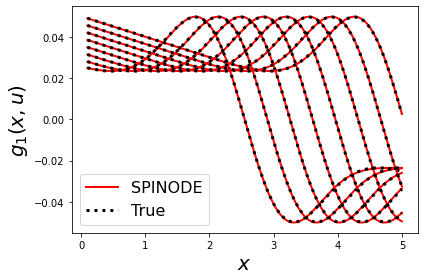

In [11]:
# Reconstruct g1
rmse_g1 = train.reconstruct_CSA('g1',
                                model_g1, 
                                device,
                                sigma_mu, 
                                sigma_std, 
                                nx,
                                nu,
                                dt,
                                path)

In [12]:
# Set training parameters for neural network that approximates g2
hidden_dim_g2 = 100 # number of hidden nodes
num_hidden_layers_g2 = 2 # number of hidden layers
num_epoch_g2 = 500 # number of epochs
solver_g2 = 'euler' # ode solver
# Note that for the provided data, the 'euler' ODE solver performs the best.
# See O'Leary, et al., 2022 for more details
rtol_g2 = 1e-3 # default value 1e-7
atol_g2 = 1e-3 # default value 1e-9

In [13]:
# Prepare target data for training neural network that approximates g2
[g2_target_train,
 g2_target_val,
 g2_target_test] = train.calc_g2_targets(sigma_train,
                                         sigma_val,
                                         sigma_test,
                                         mean_f_train,
                                         mean_f_val,
                                         mean_f_test,
                                         cov_f_train,
                                         cov_f_val,
                                         cov_f_test,
                                         nx,
                                         nu, 
                                         nw,
                                         dt,
                                         sigma_mu,
                                         sigma_std,
                                         W_train,
                                         W_val,
                                         W_test,
                                         model_g1,
                                         device,
                                         solver_g1,
                                         rtol_g1,
                                         atol_g1,
                                         path)

In [14]:
# Train neural network that approximates g2
model_g2 = train.train_g2(hidden_dim_g2, 
                          num_hidden_layers_g2, 
                          device,
                          nx,
                          nu,
                          dt,
                          num_epoch_g2,
                          sigma_train,
                          sigma_val,
                          g2_target_train,
                          g2_target_val, 
                          solver_g2,
                          rtol_g2,
                          atol_g2,
                          path)

Epoch 0000 | Train Loss 0.000009322 | Val Loss 0.000000496
5.798763751983643
Epoch 0001 | Train Loss 0.000002551 | Val Loss 0.000004137
5.762639760971069
Epoch 0002 | Train Loss 0.000002135 | Val Loss 0.000003415
5.762979030609131
Epoch 0003 | Train Loss 0.000001390 | Val Loss 0.000000677
5.696678161621094
Epoch 0004 | Train Loss 0.000001178 | Val Loss 0.000000319
5.704265356063843
Epoch 0005 | Train Loss 0.000000770 | Val Loss 0.000000637
5.810337781906128
Epoch 0006 | Train Loss 0.000000634 | Val Loss 0.000000356
5.776486873626709
Epoch 0007 | Train Loss 0.000000518 | Val Loss 0.000000591
5.764508485794067
Epoch 0008 | Train Loss 0.000000434 | Val Loss 0.000000290
5.855500936508179
Epoch 0009 | Train Loss 0.000000398 | Val Loss 0.000000524
5.865909814834595
Epoch 0010 | Train Loss 0.000000377 | Val Loss 0.000000291
5.753982782363892
Epoch 0011 | Train Loss 0.000000359 | Val Loss 0.000000315
5.765138864517212
Epoch 0012 | Train Loss 0.000000335 | Val Loss 0.000000284
5.685481786727905

Epoch 0107 | Train Loss 0.000000005 | Val Loss 0.000000005
5.71764063835144
Epoch 0108 | Train Loss 0.000000005 | Val Loss 0.000000005
5.726560831069946
Epoch 0109 | Train Loss 0.000000005 | Val Loss 0.000000005
5.730231285095215
Epoch 0110 | Train Loss 0.000000005 | Val Loss 0.000000005
5.647533893585205
Epoch 0111 | Train Loss 0.000000005 | Val Loss 0.000000005
5.723095417022705
Epoch 0112 | Train Loss 0.000000005 | Val Loss 0.000000005
5.693673849105835
Epoch 0113 | Train Loss 0.000000005 | Val Loss 0.000000005
5.801565408706665
Epoch 0114 | Train Loss 0.000000005 | Val Loss 0.000000005
5.696918487548828
Epoch 0115 | Train Loss 0.000000005 | Val Loss 0.000000005
5.820922374725342
Epoch 0116 | Train Loss 0.000000005 | Val Loss 0.000000005
5.790827512741089
Epoch 0117 | Train Loss 0.000000005 | Val Loss 0.000000005
5.625268936157227
Epoch 0118 | Train Loss 0.000000005 | Val Loss 0.000000005
5.714334964752197
Epoch 0119 | Train Loss 0.000000005 | Val Loss 0.000000005
5.683270215988159


Epoch 0214 | Train Loss 0.000000005 | Val Loss 0.000000005
5.76652717590332
Epoch 0215 | Train Loss 0.000000005 | Val Loss 0.000000005
5.735613107681274
Epoch 0216 | Train Loss 0.000000005 | Val Loss 0.000000005
5.776083469390869
Epoch 0217 | Train Loss 0.000000005 | Val Loss 0.000000005
5.730045318603516
Epoch 0218 | Train Loss 0.000000005 | Val Loss 0.000000005
5.882090330123901
Epoch 0219 | Train Loss 0.000000005 | Val Loss 0.000000005
5.798203706741333
Epoch 0220 | Train Loss 0.000000005 | Val Loss 0.000000005
5.941442012786865
Epoch 0221 | Train Loss 0.000000005 | Val Loss 0.000000005
5.920564651489258
Epoch 0222 | Train Loss 0.000000005 | Val Loss 0.000000005
5.830790042877197
Epoch 0223 | Train Loss 0.000000005 | Val Loss 0.000000005
5.807557582855225
Epoch 0224 | Train Loss 0.000000005 | Val Loss 0.000000005
5.73375129699707
Epoch 0225 | Train Loss 0.000000005 | Val Loss 0.000000005
5.648370742797852
Epoch 0226 | Train Loss 0.000000005 | Val Loss 0.000000005
5.766725778579712
E

Epoch 0321 | Train Loss 0.000000005 | Val Loss 0.000000005
5.821545362472534
Epoch 0322 | Train Loss 0.000000005 | Val Loss 0.000000005
5.874060869216919
Epoch 0323 | Train Loss 0.000000005 | Val Loss 0.000000005
5.741953372955322
Epoch 0324 | Train Loss 0.000000005 | Val Loss 0.000000005
5.75744891166687
Epoch 0325 | Train Loss 0.000000005 | Val Loss 0.000000005
5.698107004165649
Epoch 0326 | Train Loss 0.000000005 | Val Loss 0.000000005
5.842135429382324
Epoch 0327 | Train Loss 0.000000005 | Val Loss 0.000000005
5.697136878967285
Epoch 0328 | Train Loss 0.000000005 | Val Loss 0.000000005
5.8364481925964355
Epoch 0329 | Train Loss 0.000000005 | Val Loss 0.000000005
5.633470058441162
Epoch 0330 | Train Loss 0.000000005 | Val Loss 0.000000005
5.692497968673706
Epoch 0331 | Train Loss 0.000000005 | Val Loss 0.000000005
5.684206247329712
Epoch 0332 | Train Loss 0.000000005 | Val Loss 0.000000005
5.686681032180786
Epoch 0333 | Train Loss 0.000000005 | Val Loss 0.000000005
5.757535457611084

Epoch 0428 | Train Loss 0.000000005 | Val Loss 0.000000005
5.808274984359741
Epoch 0429 | Train Loss 0.000000005 | Val Loss 0.000000005
5.7870752811431885
Epoch 0430 | Train Loss 0.000000005 | Val Loss 0.000000005
5.788859844207764
Epoch 0431 | Train Loss 0.000000005 | Val Loss 0.000000005
5.792369365692139
Epoch 0432 | Train Loss 0.000000005 | Val Loss 0.000000005
5.736144542694092
Epoch 0433 | Train Loss 0.000000005 | Val Loss 0.000000005
5.865821361541748
Epoch 0434 | Train Loss 0.000000005 | Val Loss 0.000000005
5.864076852798462
Epoch 0435 | Train Loss 0.000000005 | Val Loss 0.000000005
5.948091745376587
Epoch 0436 | Train Loss 0.000000005 | Val Loss 0.000000005
5.7490150928497314
Epoch 0437 | Train Loss 0.000000005 | Val Loss 0.000000005
5.602217197418213
Epoch 0438 | Train Loss 0.000000005 | Val Loss 0.000000005
5.708941221237183
Epoch 0439 | Train Loss 0.000000005 | Val Loss 0.000000005
5.730746269226074
Epoch 0440 | Train Loss 0.000000005 | Val Loss 0.000000005
5.6786320209503

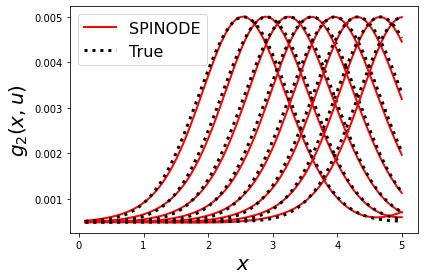

In [15]:
# Reconstruct g2
rmse_g2 = train.reconstruct_CSA('g2',
                                model_g2, 
                                device,
                                sigma_mu, 
                                sigma_std, 
                                nx,
                                nu,
                                dt,
                                path)